# Gain and Lift chart example

* ### Classification process

Data Set: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data_set = pd.read_csv(".\Data Sets\PDS.txt",sep='\t')

data_set.head()

,Pregnencies,Plasma,Diastolic,Triceps,Serum,Body mass index,Pedigree,Age,Diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#shape of the data set

data_set.shape

(768, 9)

In [4]:
data_set.columns

Index(['Pregnencies', 'Plasma', 'Diastolic', 'Triceps', 'Serum',
       'Body mass index', 'Pedigree', 'Age', 'Diabete'],
      dtype='object')

In [5]:
data_set.dtypes

Pregnencies          int64
Plasma               int64
Diastolic            int64
Triceps              int64
Serum                int64
Body mass index    float64
Pedigree           float64
Age                  int64
Diabete              int64
dtype: object

* Convert above data set into Features and response

In [6]:
#convert DataFrame into Matrix
mat_data = data_set.as_matrix()

#Feature Matrix
x = mat_data[:,0:8]

#Response Series/Vector
y = mat_data[:,8].astype('int')

In [7]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


* Split data into Train and test data set

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(537, 8) (231, 8) (537,) (231,)


In [9]:
#instantiate the model
logreg = LogisticRegression()

#fit the model train data
logreg.fit(xtrain,ytrain)

#The Co-efficient & Intercept
print(logreg.coef_,logreg.intercept_)

[[ 0.08142757  0.02615776 -0.01696135  0.00531404 -0.000753    0.05360851
   0.50768925  0.01373801]] [-5.43708967]


In [10]:
#Saving Co-efficient into dataframe
df_columns = data_set.columns[0:8]
coef_df = pd.DataFrame(logreg.coef_.flatten(),index = df_columns,columns=['Co-efficient Values'])

coef_df

,Co-efficient Values
Pregnencies,0.081428
Plasma,0.026158
Diastolic,-0.016961
Triceps,0.005314
Serum,-0.000753
Body mass index,0.053609
Pedigree,0.507689
Age,0.013738


In [11]:
#Predict on Feature test data
ypred = logreg.predict(xtest)

In [12]:
#print confusion matrics
cm = confusion_matrix(ytest,ypred)

print(cm)

[[142  15]
 [ 35  39]]


In [13]:
#print accuracy of the model
acc = accuracy_score(ytest,ypred)

#error rate 
err = 1.0 -acc

print("Accuracy of test:%f and error rate of test:%f"%(acc,err))

Accuracy of test:0.783550 and error rate of test:0.216450


In [14]:
#sensibility and specificity
def scores_sp_se(y,y_hat):
    scores_list = ['Sensitivity','Specificity']
    cm = confusion_matrix(y,y_hat)
    se = cm[1:,0] / cm[1:].sum()
    sp = cm[:1,0] / cm[:1].sum()
    scores = list(se) + list(sp)
    zipped = zip(scores_list,scores)    
    return(list(zipped))

#make a function usable as the scorer object
scorer = make_scorer(scores_sp_se) 
print(scorer(logreg,xtest,ytest))

[('Sensitivity', 0.47297297297297297), ('Specificity', 0.90445859872611467)]


*  ### Cross validation

In [15]:
# Cross validation on entire data set using cross_val_score

#instantiate the model
logreg = LogisticRegression()

#fit the model for entire data_set
logreg.fit(x,y)

#Saving Co-efficient into dataframe
df_columns = data_set.columns[0:8]
coef_df = pd.DataFrame(logreg.coef_.flatten(),index = df_columns,columns=['Co-efficient Values'])

coef_df

,Co-efficient Values
Pregnencies,0.117052
Plasma,0.028387
Diastolic,-0.016890
Triceps,0.000755
Serum,-0.000643
Body mass index,0.059760
Pedigree,0.677672
Age,0.007239


In [16]:
#Create Probability data

success = cross_val_score(logreg,x,y,cv=10,scoring='accuracy')

print(success.mean())

0.766968557758


* ### Scoring using Gain chart

In [17]:
#Instantiate the model

logreg = LogisticRegression()

#fit the model
logreg.fit(xtrain,ytrain)

#returns both negative and Positive probability
proba = logreg.predict_proba(xtest)
print("Negative Prob    Postive Prob\n",proba)

Negative Prob    Postive Prob
 [[ 0.10920054  0.89079946]
 [ 0.78985405  0.21014595]
 [ 0.85940384  0.14059616]
 [ 0.39127332  0.60872668]
 [ 0.82582806  0.17417194]
 [ 0.92366326  0.07633674]
 [ 0.32282934  0.67717066]
 [ 0.25660159  0.74339841]
 [ 0.59261485  0.40738515]
 [ 0.62419433  0.37580567]
 [ 0.45794595  0.54205405]
 [ 0.10428529  0.89571471]
 [ 0.69156969  0.30843031]
 [ 0.77680046  0.22319954]
 [ 0.83023966  0.16976034]
 [ 0.79518417  0.20481583]
 [ 0.19572227  0.80427773]
 [ 0.9304532   0.0695468 ]
 [ 0.59224198  0.40775802]
 [ 0.68606481  0.31393519]
 [ 0.42848123  0.57151877]
 [ 0.64666115  0.35333885]
 [ 0.64361903  0.35638097]
 [ 0.90376459  0.09623541]
 [ 0.89755231  0.10244769]
 [ 0.6203647   0.3796353 ]
 [ 0.91316821  0.08683179]
 [ 0.17791729  0.82208271]
 [ 0.82073279  0.17926721]
 [ 0.79441775  0.20558225]
 [ 0.5263097   0.4736903 ]
 [ 0.72151618  0.27848382]
 [ 0.87235022  0.12764978]
 [ 0.52893788  0.47106212]
 [ 0.81729252  0.18270748]
 [ 0.33748063  0.6625193

In [18]:
#we are interested in Positive probability(i.e. Response)
pos_prob = proba[:,1]

#transforming 0/1 the ytest vector
pos = pd.get_dummies(ytest).as_matrix()[:,1]

#indices that would sort according to the posive probability
index = np.argsort(pos_prob)[::-1]

#sorted positions
sort_pos = pos[index]

#cumulated sum
cum_pos = np.cumsum(sort_pos)

#recall column
recall = cum_pos/np.sum(pos)

#no of instance in the ytest
n = ytest.shape[0]

#Base Rate
Base_rate = np.arange(1,n+1)

#Base_rate percentage
Base_rate= Base_rate/n

lift = cum_pos/np.arange(1,n+1)

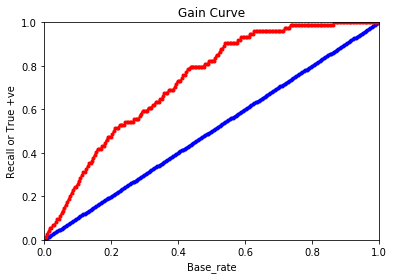

In [19]:
# Gain curve plot

plt.title("Gain Curve")
plt.xlabel("Base_rate")
plt.ylabel("Recall or True +ve")

#limits in horizontal and vertical axes
plt.xlim(0,1)
plt.ylim(0,1)
#tricks to represent the diagonal
plt.plot(Base_rate,Base_rate,marker='.',color='blue')
#gains curve
plt.plot(Base_rate,recall,marker='.',color='red')
#show the chart
plt.show()


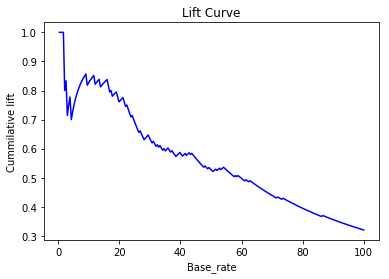

In [20]:
# Cummulative Lift plot

plt.title("Lift Curve")
plt.xlabel("Base_rate")
plt.ylabel("Cummilative lift")

#plt.scatter()
plt.plot(Base_rate*100,lift,color='blue')
plt.show()

In [21]:
df = pd.DataFrame(cum_pos,columns=['A'])

df['decile'] = (df['A'].argsort().argsort()/float(len(df))*10).astype(int)

index = df.groupby(df.decile).mean().index
decile_values = df.groupby(df.decile).mean()['A']

print(decile_values)

decile
0    10.166667
1    29.086957
2    40.347826
3    48.869565
4    58.565217
5    66.260870
6    70.695652
7    72.565217
8    73.391304
9    74.000000
Name: A, dtype: float64


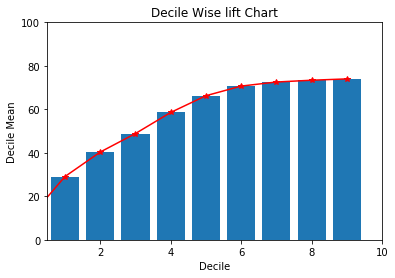

In [22]:
#Decile Chart plot

plt.title("Decile Wise lift Chart")
plt.xlabel("Decile")
plt.ylabel("Decile Mean")
plt.xlim(0.5,10)
plt.ylim(0,100)
plt.bar(index,decile_values)

plt.plot(index,decile_values,marker='*',color='Red')
plt.show()

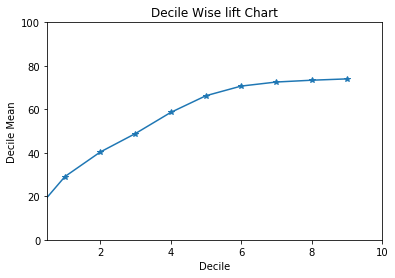

In [23]:
#Decile Chart plot

plt.title("Decile Wise lift Chart")
plt.xlabel("Decile")
plt.ylabel("Decile Mean")
plt.xlim(0.5,10)
plt.ylim(0,100)
plt.plot(index,decile_values,marker='*')
plt.show()

**Reference 1:** https://eric.univ-lyon2.fr/~ricco/cours/slides/PJ%20-%20en%20-%20machine%20learning%20avec%20scikit-learn.pdf

**Reference 2(Gant Chart):** https://www.youtube.com/watch?v=uwrjI0TT6xc

**Reference 3(Decile):** http://thread.gmane.org/gmane.comp.python.pystatsmodels/6742
 
For more accurate documentation regaring funtions used in this code please refer to Sklearn Documentation